# Predicting House Price using Keras

In this tutorial we will build a MLP network to predict the house price.

# About the dataset

The dataset contains 11 columns and 1460 rows:

1. Lot Area (in sq ft)
2. Overall Quality (scale from 1 to 10)
3. Overall Condition (scale from 1 to 10)
4. Total Basement Area (in sq ft)
5. Number of Full Bathrooms
6. Number of Half Bathrooms
7. Number of Bedrooms above ground
8. Total Number of Rooms above ground
9. Number of Fireplaces
10. Garage Area (in sq ft).

The last column (column k) tells us whether the price of the house is above or below a certain median value. ( 0 or 1 )

You can download the dataset from [here](https://github.com/josephlee94/intuitive-deep-learning/blob/master/Part%201:%20Predicting%20House%20Prices/housepricedata.csv)





We will use the following steps to build the neural network model.
1. Load the dataset
2. Define Keras Model
3. Compile Keras Model
4. Fit Keras Model
5. Evaluate Keras Model
6. Make Predictions
7. Check accuracy and loss of the model

#Python Libraries


We will use the following Python libraries for building the model

* Pandas
* sklearn
* keras
* matplotlib






### Pandas
Pandas is a Python library which is used to analyze datasets.It has functions for analyzing, cleaning, exploring, and manipulating data.Pandas gives you answers about the data. Like:

*Is there a correlation between two or more columns?
* What is average value?
* Max value?
* Min value?
Pandas are also able to delete rows that are not relevant, or contains wrong values, like empty or NULL values. This is called cleaning the data.

The source code for Pandas is located at this github repository https://github.com/pandas-dev/pandas

### Sklearn

Rather than focusing on loading, manipulating and summarising data, Scikit-learn library is focused on modeling the data. Let's see what libraries from sklearn we will be using in this project:

* preprocessing in sklearn ( MinMaxScaler() )
    * As we are dealing with lots of data and that data is in raw form, before inputting that data to machine learning algorithms, we need to convert it into meaningful data. This process is called preprocessing the data. Scikit-learn has package named preprocessing for this purpose . We will be using "MinMaxScaler()" from preprocessing to scale the features (parameters).Scaling of feature vectors is important, because the features should not be synthetically large or small.

* splitting the dataset ( train_test_split() )
   
   * To check the accuracy of our model, we can split the dataset into two pieces-a training set and a testing set. Use the training set to train the model and testing set to test the model. After that, we can evaluate how well our model did. We will be using " train_test_split()" function of scikit-learn to split the dataset. 

The following github repository contains the source code for sklearn :https://github.com/scikit-learn/scikit-learn


### Keras
Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.Keras leverages various optimization techniques to make high level neural network.Let us quickly see what libraries from keras would we be using:

* Sequential

   * The core idea of Sequential API is simply arranging the Keras layers in a sequential order and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer

* Dense 
   
   * Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. Dense layer does the below operation on the input and return the output.

output = activation(dot(input, kernel) + bias)
where ,
  * input represent the input data
  * kernel represent the weight data
  * dot represent numpy dot product of all input and its corresponding weights
  * bias represent a biased value used in machine learning to optimize the model
  * activation represent the activation function.

### Matplotlib
 Matplotlib is one of the most popular Python packages used for data visualization. It is used for making 2D plots from data in arrays



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd                      #This means that I want to refer to code in the package ‘pandas’, by referring to it with the name pd
from sklearn import preprocessing         #This means I want to use the code in ‘preprocessing’ within the sklearn package
from sklearn.model_selection import train_test_split    #used to split the data into training and testing from sklearn 
from keras.models import Sequential     # imorting the sequential  from keras library. 
from keras.layers import Dense            #importing dense model from keras

# 1. Load the dataset

You can download the dataset from [here](https://github.com/josephlee94/intuitive-deep-learning/blob/master/Part%201:%20Predicting%20House%20Prices/housepricedata.csv)

In [ ]:
                     
df = pd.read_csv('/content/drive/MyDrive/datasets/deep learning/housepricedata.csv')    #This means that we will read the csv file ‘housepricedata.csv’ and store it in the variable ‘df’

## 1.1 Exploring the dataset

In [ ]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


We have our input features in the first ten columns:

1. Lot Area (in sq ft)
2. Overall Quality (scale from 1 to 10)
3. Overall Condition (scale from 1 to 10)
4. Total Basement Area (in sq ft)
5. Number of Full Bathrooms
6. Number of Half Bathrooms
7. Number of Bedrooms above ground
8. Total Number of Rooms above ground
9. Number of Fireplaces
10. Garage Area (in sq ft)

In our last column, we have the feature that we would be predicting i.e. whether the price of the house is above or below the median value ,1 for yes and 0 for no.



# 1.2 Preprocessing
In this step we will explore the dataset and clean the dataset.


 



We will complete the following in this step
* Read the CSV (comma separated values) file and convert them to arrays.
* Split our dataset into input features and the label.
* Scale the data so that the input features have similar orders of magnitude.
* Split our dataset into the training set, the validation set and the test set.

We have to convert the values from the dataset into arrays for procesing so that we can apply various mathematical functions and hence it is easier to work on it.

To convert our dataframe into an array, we just store the values of df (by accessing df.values) into the variable ‘dataset’. To see what is inside this variable ‘dataset’, simply type ‘dataset’

In [ ]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

We now split our dataset into input features (X) and the feature we wish to predict (Y). To do that split, we simply assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y.

In [ ]:
X = dataset[:,0:10] #Everything before the comma refers to the rows of the array and everything after the comma refers to the columns of the arrays.
Y = dataset[:,10]  #Since we’re not splitting up the rows, we put ‘:’ before the comma. This means to take all the rows in dataset and put it in X.
 #We want to extract out the first 10 columns, and so the ‘0:10’ after the comma means take columns 0 to 9 and put it in X (we don’t include column 10). Our columns start from index 0, so the first 10 columns are really columns 0 to 9.
#We then assign the last column of our array to Y:

Most of the times, your dataset will contain features highly varying in magnitudes, units and range.  The features with high magnitudes will weigh in a lot more than features with low magnitudes. To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

For this we will be using "MinMaxScaler()" from preprocessing to scale the features.This estimator scales and translates each feature individually such that it is in the given range on the training set i.e between 0 and 1.

In [ ]:
        
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
from sklearn.model_selection import train_test_split   #used to split the data into training and testing

 we split the dataset into training and testing to scale the features.

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)  #your val_and_test size will be 30% of the overall dataset.

the above code will store the split data into the first four variables on the left of the equal sign.

Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In summary, we now have a total of six variables for our datasets we will use:

*  X_train (10 input features, 70% of full dataset)
*  X_val (10 input features, 15% of full dataset)
*  X_test (10 input features, 15% of full dataset)
*  Y_train (1 label, 70% of full dataset)
*  Y_val (1 label, 15% of full dataset)
*  Y_test (1 label, 15% of full dataset

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)  # to see the dimension of each variable

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


the training set has 1022 data points while the validation and test set has 219 data points each. The X variables have 10 input features, while the Y variables only has one feature to predict.

# 2. Define keras model

The sequential API allows you to create models layer-by-layer.

The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer.the dense layer performs a matrix-vector multiplication.


we want to have these layers:

* Hidden layer 1: 32 neurons, ReLU activation
* Hidden layer 2: 32 neurons, ReLU activation
* Output Layer: 1 neuron, Sigmoid activation



In [ ]:
# define the keras model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

This says that we will store our model in the variable ‘model’, and we’ll describe it sequentially (layer by layer) in between the square brackets.

We have our first layer as a dense layer with 32 neurons, ReLU activation and the input shape is 10 since we have 10 input features.

Our second layer is also a dense layer with 32 neurons, ReLU activation.We do not have to describe the input shape since Keras can infer from the output of our first layer

Our third layer is a dense layer with 1 neuron, sigmoid activation.

# 3. Compile Keras Model :

 The compilation is the final step in creating a model.It    configures the model for training.
 
 For this we define 3 things: loss function,optimizer and metrics

* Loss-  Loss function is used to find error or deviation in the learning process
* optimization - Optimization is an important process which optimize the input weights by comparing the prediction and the loss function.
* metrics - Metrics is used to evaluate the performance of the model.it is used to track accuracy on top of the loss function


In [ ]:
#compiling the model
model.compile(optimizer='sgd',         #the optimizer used is stochastic gradient descent
              loss='binary_crossentropy',  #the loss function used is binary cross entropy
              metrics=['accuracy'])         #the metrics used is accuracy

There are various different types of loss functions, optimizers and metrics that are used. You can go through [this link](https://www.tutorialspoint.com/keras/keras_model_compilation.htm) to see all of them.

# 4. Fit keras model



Model fitting is a measure of how well a model generalizes to similar data to that on which it was trained. A model that is well-fitted produces more accurate outcomes.During the fitting process, you run an algorithm on data for which you know the target variable, known as “labeled” data, and produce a model. Then, you compare the outcomes to real, observed values of the target variable to determine their accuracy. Next, you use that information to adjust the algorithm’s standard parameters to reduce the level of error, making it more accurate in uncovering patterns and relationships between the rest of its features and the target. You repeat this process until the algorithm finds the optimal parameters that produce valid, practical, applicable insights for your problem.

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2367 - accuracy: 0.8924 - val_loss: 0.2758 - val_accuracy: 0.8721
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2368 - accuracy: 0.8973 - val_loss: 0.2729 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.8992 - val_loss: 0.2743 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.8992 - val_loss: 0.2606 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2354 - accuracy: 0.9012 - val_loss: 0.2646 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.8982 - val_loss: 0.2798 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.8992 - val_loss: 0.2661 - val_accuracy: 0.8676
Epoch 8/100
3

The function is called ‘fit’ as we are fitting the parameters to the data. We have to specify what data we are training on, which is X_train and Y_train. Then, we specify the size of our batch and how long we want to train it for (epochs). Lastly, we specify what our validation data is so that the model will tell us how we are doing on the validation data at each point. This function will output a history, which we save under the variable hist.

# 5. Evaluate keras model

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the test dataset.

In [ ]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.8995


0.8995434045791626

The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0).

# 6. Making predictions
We can adapt the above example and use it to generate predictions on the training dataset, pretending it is a new dataset 

In [ ]:
predictions = model.predict(X)  # using the model to predict on training data i.e. x and 
                                # storing it in the variable "predictions"
                                
predictions[:5]    #viewing only the first 5 model predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

So our model predicted 1(above median value) for the first 5 inputs. If we compare our predicted output with the output from training dataset we can see that the fourth input has the value 0(below median price) whereas our model predicted 1 that is beacuse our model achieved an accuracy of about 89-90 percent. For our model to predict more accurate results we have to train our model with more data. You can go through 
[this](https://machinelearningmastery.com/improve-deep-learning-performance/) link to see what other parameters needs to changed in order to achieve greater accuracy.




# 7. Check the accuracy of the model
###Training loss and validation loss
 One can learn a lot about neural networks and deep learning models by observing their performance over time during training.Training loss is the error on the training set of data. Validation loss is the error after running the validation set of data through the trained network. 

By doing this we can see how well our algorithm models the dataset. If the predictions are totally off, the loss function will output a higher number. If they’re pretty good, it’ll output a lower number. As we can see , as the number of epochs increases the value of loss decreases

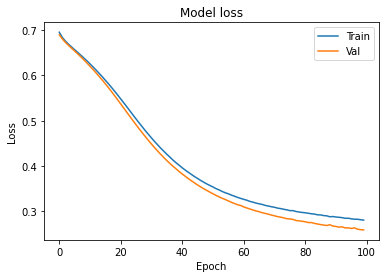

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

The first two lines says that we want to plot the loss and the val_loss. The third line specifies the title of this graph, “Model Loss”. The fourth and fifth line tells us what the y and x axis should be labelled respectively. The sixth line includes a legend for our graph, and the location of the legend will be in the upper right. And the seventh line shows the output. Similarly we can do for accuracy as well

### Training accuracy and validation accuracy

To have a visual understanding on how the model trained between the epochs, let's try to plot the graph of training and validation accuracy. It is similar to how we visualised  the loss functions. The only difference being here, as the number of epochs inceases the accuracy of the model increases as well.

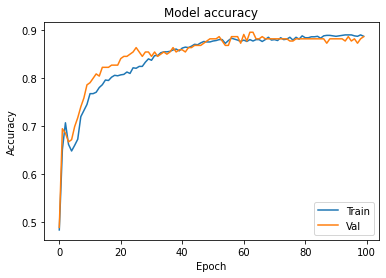

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Similar to what we did above in visualising the loss,the first two lines says that we want to plot the accuracy and the val_accuracy. The third line specifies the title of this graph, “Model accuruacy”. The fourth and fifth line tells us what the y and x axis should be labelled respectively. The sixth line includes a legend for our graph, and the location of the legend will be in the upper right. And the seventh line shows the output.